In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

GPStore = pd.read_csv("../input/googleplaystore.csv")
GPStore     # reads the Google Play store dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [2]:
GPStore['Rating'].describe()  # Get the ratings 

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [3]:
# Get the size 
GPStore['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [4]:
# GEt the installs
GPStore['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [5]:
# Number of genres
GPStore['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

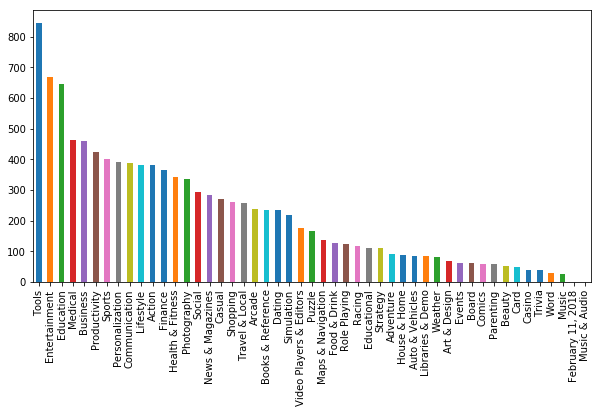

In [6]:
GPStore['Main Genre'] = GPStore['Genres'].apply(lambda x: x.split(';')[0])
GPStore['Sub Genre'] = GPStore['Genres'].apply(lambda x: x.split(';')[1] if len(x.split(';')) > 1 else 'no sub genre')

plt.figure(figsize=(10,5))
GPStore['Main Genre'].value_counts().plot(kind='bar')

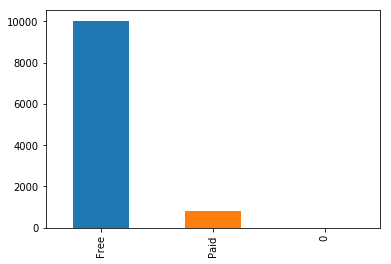

In [7]:
# Compare whats free and not free
GPStore['Type'].value_counts().plot(kind='bar')

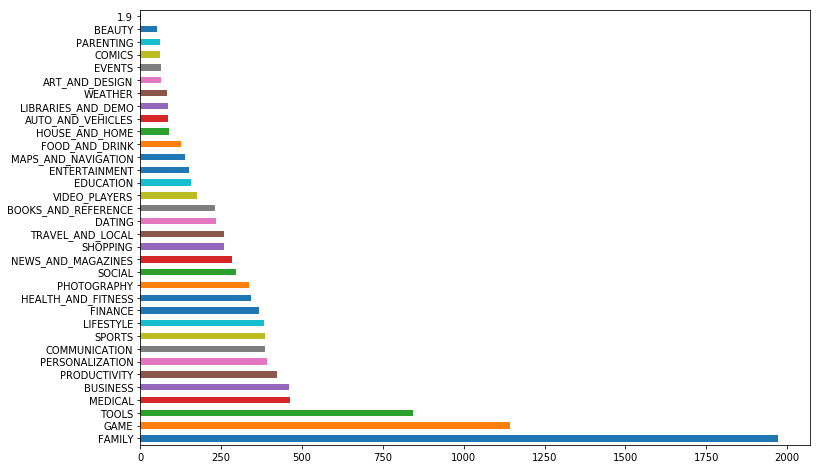

In [8]:
# Count of each category
GPStore.Category.value_counts().plot(kind='barh',figsize= (12,8))

Text(0.5, 1.0, 'Count of each app category')

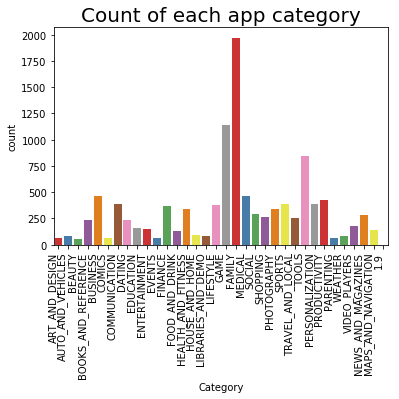

In [9]:
# Count of each category
catCount = sns.countplot(x="Category",data=GPStore, palette = "Set1")
catCount.set_xticklabels(catCount.get_xticklabels(), rotation=90, ha="right")
catCount 
plt.title('Count of each app category',size = 20)

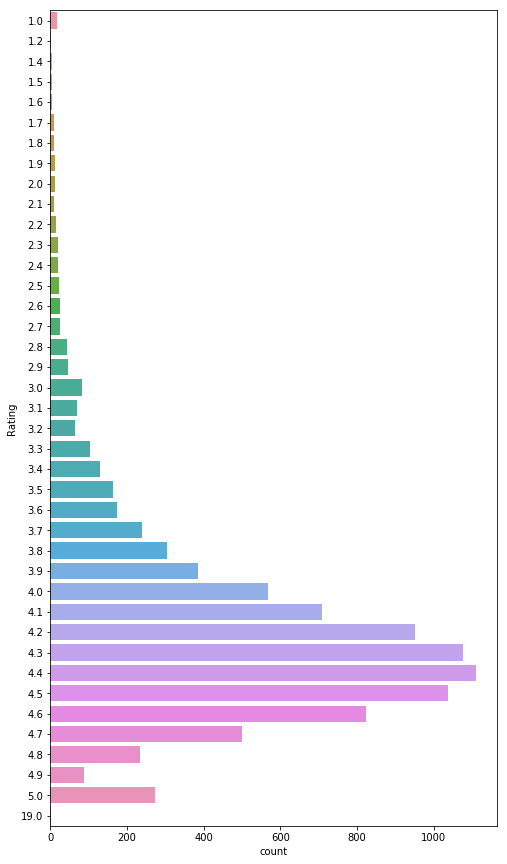

In [10]:
# total count of ratings
plt.figure(figsize=(8, 15))
sns.countplot(y='Rating',data=GPStore )
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


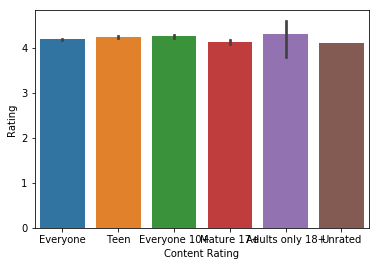

In [11]:
# Contnt rating by each categorey
sns.barplot(x='Content Rating', y='Rating', data=GPStore)

AttributeError: 'str' object has no attribute 'conjugate'

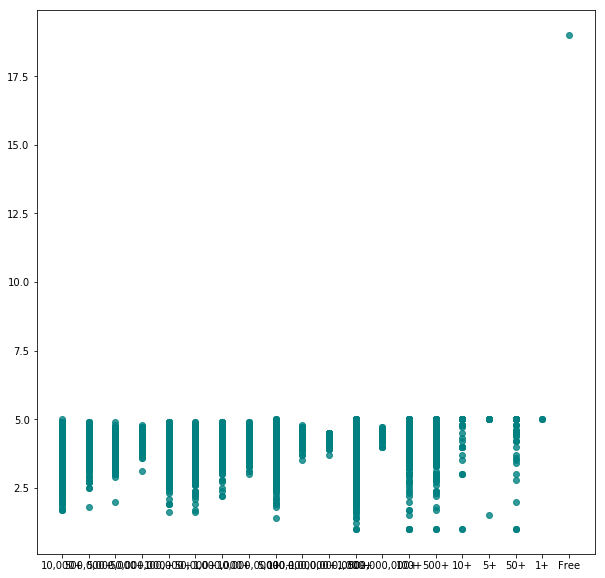

In [12]:
# Error that needs to be fixed!
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=GPStore)
plt.title('Rating VS Installs',size = 20)

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
Main Genre        False
Sub Genre         False
dtype: bool

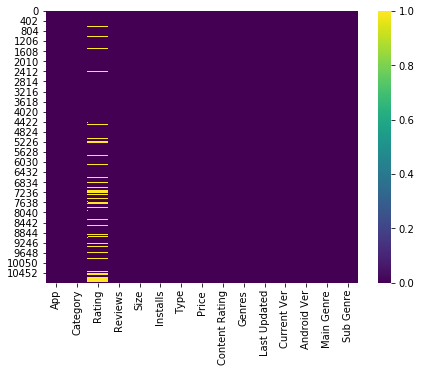

In [13]:
# Find missing data to see if any has NaN values.
# Which finds most missing values for "rating". 
plt.figure(figsize=(7,5))
sns.heatmap(GPStore.isnull(), cmap='viridis')
GPStore.isnull().any()

In [14]:
GPStore.isnull().sum() # Clearer stat to handle missing data

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Main Genre           0
Sub Genre            0
dtype: int64

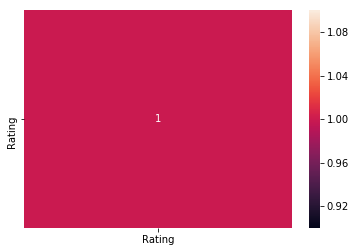

In [15]:
# This doesn't look right at all 

corr = GPStore.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

In [16]:
GPStore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Main Genre', 'Sub Genre'],
      dtype='object')

In [17]:
GPStore.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main Genre,Sub Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,no sub genre
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,no sub genre


In [18]:
from sklearn import tree
import sys
import re

# The best way to fill missing values might be using the median instead of mean.
GPStore['Rating'] = GPStore['Rating'].fillna(GPStore['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"  ]
for i in replaces:
    GPStore['Current Ver'] = GPStore['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    GPStore['Current Ver'] = GPStore['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

GPStore['Current Ver'] = GPStore['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
GPStore['Current Ver'] = GPStore['Current Ver'].fillna(GPStore['Current Ver'].median())

In [19]:
GPStore['Category'].unique() # Counts the number of uniuque values in category columns

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [20]:
# Checks the record  of unreasonable value which is 1.9
i = GPStore[GPStore['Category'] == '1.9'].index
GPStore.loc[i]

# Drop this bad column
GPStore = GPStore.drop(i)

# Removes NaN values
GPSTore = GPStore[pd.notnull(GPStore['Last Updated'])]
GPStore = GPStore[pd.notnull(GPStore['Content Rating'])]

In [21]:
# Trying to encode App values 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
GPStore['App'] = le.fit_transform(GPStore['App']) # Encoder converts the values into numeric values
# Category features encoding
category_list = GPStore['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
GPStore = pd.concat([GPStore, pd.get_dummies(GPStore['Category'], prefix='cat')], axis=1)

In [22]:
# Genres encoding fot the features
le = preprocessing.LabelEncoder()
GPStore['Genres'] = le.fit_transform(GPStore['Genres'])

In [23]:
# Encode the "Content Rating" 
le = preprocessing.LabelEncoder()
GPStore['Content Rating'] = le.fit_transform(GPStore['Content Rating'])

In [24]:
# Price 
GPStore['Price'] = GPStore['Price'].apply(lambda x : x.strip('$'))

In [25]:
# Installs 
GPStore['Installs'] = GPStore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [26]:
# Type encoding
GPStore['Type'] = pd.get_dummies(GPStore['Type'])

In [27]:
# Encoding th Last Updated
import time
import datetime
GPStore['Last Updated'] = GPStore['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [28]:
# Convert kbytes to Mbytes
#selecting all k values from the "Size" column and replace those values by 
# their corresponding M values, and since k indices belong to a list of 
# non-consecutive numbers, a new dataframe (converter) will be created with 
# these k indices to perform the conversion, then the final values will be 
# assigned back to the "Size" column.

k_indices = GPStore['Size'].loc[GPStore['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(GPStore.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
GPStore.loc[k_indices,'Size'] = converter

In [29]:
# Size cleaning
GPStore['Size'] = GPStore['Size'].apply(lambda x: x.strip('M'))
GPStore[GPStore['Size'] == 'Varies with device'] = 0
GPStore['Size'] = GPStore['Size'].astype(float)

In [30]:
# Predict app ratings based on the other matrices
# Split data into training and testing sets
attributes = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
attributes.extend(category_list)
X = GPStore[attributes]
y = GPStore['Rating']

# Should splits the dataset into 85% train data and 25% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [31]:
# Looks at the 15 closest neighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=15)

# Finds the mean accuracy of KNN regression using X_test and y_test
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='uniform')

In [32]:
# Calculates the mean accuracy of the KNN model
acc = model.score(X_test,y_test)  # accuracy
'Accuracy: ' + str(np.round(acc*100, 2)) + '%'

'Accuracy: 92.22%'

[(10, 0.9342549759189722),
 (20, 0.9353172531216246),
 (30, 0.9369442271335046),
 (40, 0.9375397992931791),
 (50, 0.9372909552546856),
 (60, 0.9377762661016847),
 (70, 0.9377868111359393),
 (80, 0.9379205338444808),
 (90, 0.9385733371129169),
 (100, 0.9385337316184769),
 (110, 0.9379049958077659),
 (120, 0.9373602820708321),
 (130, 0.9378505725821116),
 (140, 0.9380427607661183),
 (150, 0.9379545388545079),
 (160, 0.937966651938726),
 (170, 0.9379399819065913),
 (180, 0.9382516235460021),
 (190, 0.9379510945461194)]

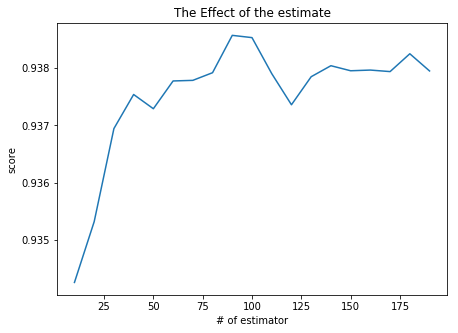

In [33]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("The Effect of the estimate")
plt.xlabel("# of estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [34]:
from sklearn import metrics

predictions = model.predict(X_test)
'Mean Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Error:', 0.24235618566711997)

In [35]:
# The mean squared error percentage
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.16190253334832513)

In [36]:
# The Root mean
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.4023711388113282)